# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

from ipyleaflet import Map 
from ipyleaflet import basemaps 

import matplotlib.pyplot as plt
import matplotlib as mpl

from pyproj import Proj
from ipyleaflet import (Map, basemaps, WidgetControl, GeoJSON, 
                        LayersControl, Icon, Marker,FullScreenControl,
                        CircleMarker, Popup, AwesomeIcon) 
from ipywidgets import HTML

import seaborn as sns

from climate_resilience import constants as C
from climate_resilience import visualize as viz

# Access Data

In [2]:
datadir = "/global/scratch/satyarth/Projects/lbnl-zexuan-code/data"
lm_simplfied_csv_path = os.path.join(datadir, "LM_sites_with_geography.csv")
lm_simplfied = pd.read_csv(lm_simplfied_csv_path)
lm_simplfied

,Unnamed: 0,Name,SiteName,State,GEOGRAPHIC LOCATION
0,61,"Acid_Pueblo_Canyon, NM, Site",APC,NM,Four Corners
1,58,"Adrian, MI, Site",ADR,MI,West Coast/Alaska
2,60,"Albany, OR, Site",AOR,OR,West Coast/Alaska
3,59,"Aliquippa, PA, Site",ALP,PA,Ohio River Valley
4,0,"Ambrosia Lake, NM, Disposal Site",AMB,NM,Four Corners
...,...,...,...,...,...
105,102,"Utah, UT, Site",UTA,UT,Four Corners
106,111,"Vallectios Nuclear Center, CA, Site",VNC,CA,West Coast/Alaska
107,57,"Wayne, NJ, Site",WYN,NJ,East Coast
108,56,"Weldon Spring, MO, Site",WEL,MO,Central Plains/Texas


In [3]:
lm_site_csv_path = os.path.join(datadir, "LM_sites_with_lat_lon.csv")
lm_site = pd.read_csv(lm_site_csv_path)
lm_site

,Latitude,Longitude,Name,NameMnemonic,StateCode
0,35.884410,-106.306670,"Acid/Pueblo Canyon, NM, Site",APC,NM
1,41.887939,-84.014692,"Adrian, MI, Site",ADR,MI
2,44.620210,-123.120800,"Albany, OR, Site",AOR,OR
3,40.642126,-80.243968,"Aliquippa, PA, Site",ALP,PA
4,35.408798,-107.799285,"Ambrosia Lake, NM, Disposal Site",AMB,NM
...,...,...,...,...,...
105,39.985497,-109.611552,"Utah, UT, Site",UTA,UT
106,37.610940,-121.838659,"Vallectios Nuclear Center, CA, Site",VNC,CA
107,40.969810,-74.270270,"Wayne, NJ, Site",WYN,NJ
108,38.698168,-90.728274,"Weldon Spring, MO, Site",WEL,MO


# Data engineering to create plots

In [4]:
lm_simplfied['NCA Regions'] = list(map(C.geog_by_states, lm_simplfied['State']))
lm_simplfied['NCA_Code'] = list(map(C.geog_by_states_code, lm_simplfied['State'])) 
lm_simplfied = lm_simplfied.dropna()
lm_simplfied

,Unnamed: 0,Name,SiteName,State,GEOGRAPHIC LOCATION,NCA Regions,NCA_Code
0,61,"Acid_Pueblo_Canyon, NM, Site",APC,NM,Four Corners,Southwest,1
1,58,"Adrian, MI, Site",ADR,MI,West Coast/Alaska,Midwest,6
2,60,"Albany, OR, Site",AOR,OR,West Coast/Alaska,Northwest,2
3,59,"Aliquippa, PA, Site",ALP,PA,Ohio River Valley,Northeast,7
4,0,"Ambrosia Lake, NM, Disposal Site",AMB,NM,Four Corners,Southwest,1
...,...,...,...,...,...,...,...
105,102,"Utah, UT, Site",UTA,UT,Four Corners,Southwest,1
106,111,"Vallectios Nuclear Center, CA, Site",VNC,CA,West Coast/Alaska,Southwest,1
107,57,"Wayne, NJ, Site",WYN,NJ,East Coast,Northeast,7
108,56,"Weldon Spring, MO, Site",WEL,MO,Central Plains/Texas,Midwest,6


In [5]:
df_site = pd.merge(lm_site, lm_simplfied, how="outer")
df_site = df_site.dropna()
df_site

,Latitude,Longitude,Name,NameMnemonic,StateCode,Unnamed: 0,SiteName,State,GEOGRAPHIC LOCATION,NCA Regions,NCA_Code
1,41.887939,-84.014692,"Adrian, MI, Site",ADR,MI,58.0,ADR,MI,West Coast/Alaska,Midwest,6.0
2,44.620210,-123.120800,"Albany, OR, Site",AOR,OR,60.0,AOR,OR,West Coast/Alaska,Northwest,2.0
3,40.642126,-80.243968,"Aliquippa, PA, Site",ALP,PA,59.0,ALP,PA,Ohio River Valley,Northeast,7.0
4,35.408798,-107.799285,"Ambrosia Lake, NM, Disposal Site",AMB,NM,0.0,AMB,NM,Four Corners,Southwest,1.0
5,51.436583,179.179778,"Amchitka, AK, Site",AMC,AK,1.0,AMC,AK,West Coast/Alaska,Alaska,8.0
...,...,...,...,...,...,...,...,...,...,...,...
105,39.985497,-109.611552,"Utah, UT, Site",UTA,UT,102.0,UTA,UT,Four Corners,Southwest,1.0
106,37.610940,-121.838659,"Vallectios Nuclear Center, CA, Site",VNC,CA,111.0,VNC,CA,West Coast/Alaska,Southwest,1.0
107,40.969810,-74.270270,"Wayne, NJ, Site",WYN,NJ,57.0,WYN,NJ,East Coast,Northeast,7.0
108,38.698168,-90.728274,"Weldon Spring, MO, Site",WEL,MO,56.0,WEL,MO,Central Plains/Texas,Midwest,6.0


# Visualization of the above data on a map

In [6]:
col = ['red','orange','darkred','lightblue','cadetblue','blue','darkblue','black','green']

ipl_map = viz.plot_map(sites=df_site, 
                       feature='NCA_Code', 
                       colors=col, 
                       scale_range=[0, 9],
                       colorbar_label="NCA_Code",
                      )
ipl_map

# To save the map as an HTML file
# ipl_map.save('site_regions.html')

100%|██████████| 108/108 [00:00<00:00, 229.18it/s]


Map(center=[39.0119, -98.4842], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

---
# Further data engineering

In [7]:
def get_four_periods(df_merged, var, region):
    df1 = df_merged[['1950_1989',region]].copy()
    df1.columns = [var, region]
    df1['Period'] = '1950_1989'
    
    df2 = df_merged[['1990_2019',region]].copy()
    df2.columns = [var, region]
    df2['Period'] = '1990_2019'
    
    df3 = df_merged[['2020_2059',region]].copy()
    df3.columns = [var, region]
    df3['Period'] = '2020_2059'
    
    df4 = df_merged[['2060_2099',region]].copy()
    df4.columns = [var, region]
    df4['Period'] = '2060_2099'
    
    df_all = pd.concat([df1, df2, df3, df4])
    return df_all

In [8]:
pr_csv_path = os.path.join(datadir, "pr_four_periods.csv")
df_pr = pd.read_csv(pr_csv_path)

df_merged = df_pr.merge(lm_simplfied, left_on = 'Name.1', right_on='SiteName',how='outer')
df_merged = df_merged[['1950_1989','1990_2019','2020_2059','2060_2099','GEOGRAPHIC LOCATION','NCA Regions']]
df_merged = df_merged.dropna()
df_merged

,1950_1989,1990_2019,2020_2059,2060_2099,GEOGRAPHIC LOCATION,NCA Regions
0,1.181650,1.176159,1.191969,1.146726,Four Corners,Southwest
1,2.381370,2.447043,2.557647,2.657632,West Coast/Alaska,Midwest
2,2.895983,2.897207,2.932407,2.960798,West Coast/Alaska,Northwest
3,2.566593,2.626270,2.741836,2.843413,Ohio River Valley,Northeast
4,0.714724,0.706929,0.717270,0.697679,Four Corners,Southwest
...,...,...,...,...,...,...
99,0.463313,0.456011,0.467307,0.462052,Four Corners,Southwest
100,0.524774,0.526036,0.552592,0.555368,Four Corners,Southwest
101,3.365098,3.480345,3.662205,3.835252,East Coast,Northeast
102,2.645510,2.688983,2.813477,2.892190,Central Plains/Texas,Midwest


---
# Data Set 1

In [9]:
df_set1 = get_four_periods(df_merged, 'Pr', 'GEOGRAPHIC LOCATION')
df_set1

,Pr,GEOGRAPHIC LOCATION,Period
0,1.181650,Four Corners,1950_1989
1,2.381370,West Coast/Alaska,1950_1989
2,2.895983,West Coast/Alaska,1950_1989
3,2.566593,Ohio River Valley,1950_1989
4,0.714724,Four Corners,1950_1989
...,...,...,...
99,0.462052,Four Corners,2060_2099
100,0.555368,Four Corners,2060_2099
101,3.835252,East Coast,2060_2099
102,2.892190,Central Plains/Texas,2060_2099


## > Visualize Box Plots - Data subset 1

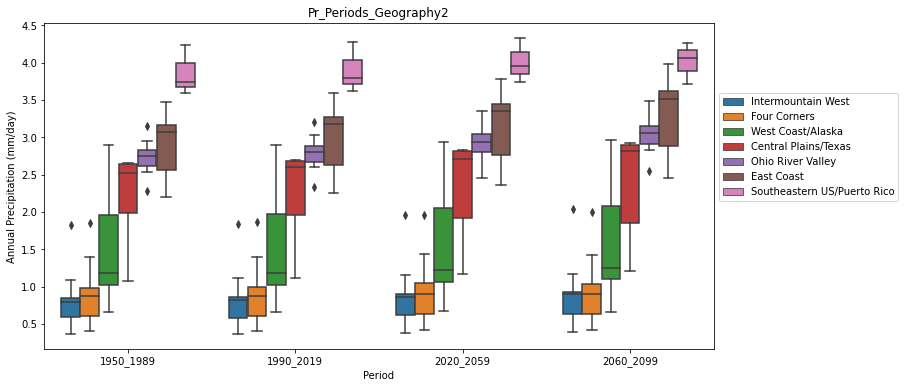

In [10]:
orders = ["Intermountain West","Four Corners","West Coast/Alaska","Central Plains/Texas","Ohio River Valley","East Coast","Southeastern US/Puerto Rico"]

viz.plot_boxplot(data=df_set1, 
                 x_feature="Period", 
                 y_feature="Pr", 
                 hue_feature="GEOGRAPHIC LOCATION", 
                 hue_order=orders,
                 y_label="Annual Precipitation (mm/day)",
                 plot_title="Pr_Periods_Geography2",
)
plt.show()

---
# Data Set 2

In [11]:
df_set2 = get_four_periods(df_merged,'Pr', 'NCA Regions')
df_set2

,Pr,NCA Regions,Period
0,1.181650,Southwest,1950_1989
1,2.381370,Midwest,1950_1989
2,2.895983,Northwest,1950_1989
3,2.566593,Northeast,1950_1989
4,0.714724,Southwest,1950_1989
...,...,...,...
99,0.462052,Southwest,2060_2099
100,0.555368,Southwest,2060_2099
101,3.835252,Northeast,2060_2099
102,2.892190,Midwest,2060_2099


## > Visualize Box Plots - Data subset 2

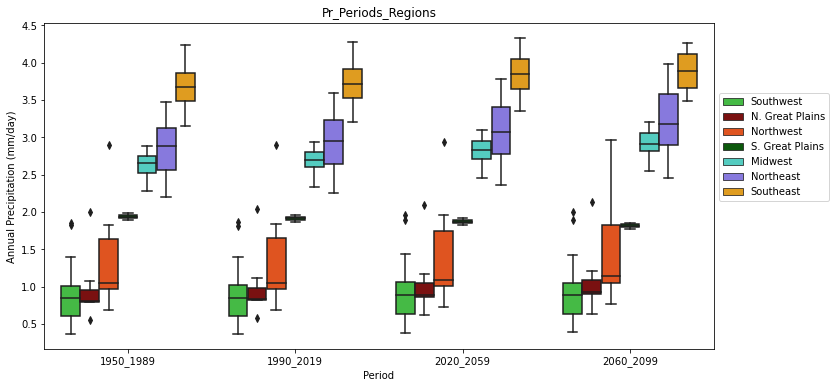

In [12]:
orders = ['Southwest','N. Great Plains','Northwest','S. Great Plains','Midwest','Northeast','Southeast']
colors = ['limegreen','darkred','orangered','darkgreen','turquoise','mediumslateblue','orange']

viz.plot_boxplot(data=df_set2, 
                 x_feature="Period", 
                 y_feature="Pr", 
                 hue_feature="NCA Regions", 
                 hue_order=orders,
                 y_label="Annual Precipitation (mm/day)",
                 plot_title="Pr_Periods_Regions",
                 colors=colors,
)
plt.show()